<a id="top"></a>  
# Fairness Analysis of Heart Disease Model
---


The first sections (through Evaluation) are from the original Kaggle code
---
#  Data Collection <a id="coll"></a>
Import Python libraries and load the dataset.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os

In [114]:
df = pd.read_csv('heart.csv')
df.shape

(303, 14)

[go to top of document](#top)     

---
#  Data Preparation <a id="prep"></a>

## Check for NULLs/Duplicates <a id="prep_null"></a>
Cleaning up the NULL and duplicate values in the dataset.

In [115]:
#  check for NULL values
print('\n--- NULL count ---\n{}'.format(df.isnull().sum()))
#df.dropna(inplace=True)             #  drop NULLs

#  check for DUPLICATES
print('\n1st DUPLICATE count:\t{}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)  #  drop duplitcates
print('2nd DUPLICATE count:\t{}'.format(df.duplicated().sum()))


--- NULL count ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

1st DUPLICATE count:	1
2nd DUPLICATE count:	0


## Feature Engineering <a id="prep_name"></a>
Rename columns (attributes) for better readability.

| Original Attribute Name | New Attribute Name   |  Description |
| :-- | :--  | :--- |
|**age**|age|age of patient
|**sex**|sex|sex of patient:  0 = female; 1 = male
|**cp**|chest_pain_type|chest pain type (4 values)
|**trestbps**|resting_blood_pressure|resting blood pressure
|**chol**|cholestoral|serum cholestoral in mg/dl
|**fbs**|fasting_blood_sugar|fasting blood sugar > 120 mg/dl
|**restecg**|resting_electrocardiographic|resting electrocardiographic results (values 0,1,2)
|**thalach**|maximum_heart_rate|maximum heart rate achieved
|**exang**|exercise_induced_angina|exercise induced angina
|**oldpeak**|ST_depression|oldpeak = ST depression induced by exercise relative to rest
|**slope**|slope_peak_exercise_ST|slope of the peak exercise ST segment
|**ca**|number_of_major_vessels|number of major vessels (0-3) colored by flourosopy
|**thal**|thal|thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [116]:
df.rename(columns={
        'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure',
        'chol':'cholestoral','fbs':'fasting_blood_sugar',
        'restecg':'resting_electrocardiographic','thalach':'maximum_heart_rate',
        'exang':'exercise_induced_angina','oldpeak':'ST_depression',
        'slope':'slope_peak_exercise_ST','ca':'number_of_major_vessels'},
    inplace=True)

print(df.columns.tolist())

['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic', 'maximum_heart_rate', 'exercise_induced_angina', 'ST_depression', 'slope_peak_exercise_ST', 'number_of_major_vessels', 'thal', 'target']


**Update categorical attribute values (features) for better readability & plotting.**

| Attribute   | Updated Feature Values 
| :-- | :-- 
|**sex** |0:female<br>1:male|
|**chest_pain_type** | 0:typical angina<br>1:atypical angina<br><br>2:non-anginal<br>3:asymptomatic|
|**fasting_blood_sugar** |0:> 120 mg/dl<br>1:< 120 mg/dl|
|**resting_electrocardiographic** |0:normal<br>1:ST-T wave abnormality<br>2:ventricular hypertrophy|
|**exercise_induced_angina** |0:no<br>1:yes|
|**slope_peak_exercise_ST** |0:upsloping<br>1:flat<br>2:downsloping|
|**thal** |0:normal 0<br>1:normal 1<br>2:fixed defect<br>3:reversable defect|
|**target** |0:no disease<br>1:disease|

In [117]:
df['sex'] = df['sex'].map({0:'female', 1:'male'})
df['chest_pain_type'] = df['chest_pain_type'].map({
        0:'typical angina', 1:'atypical angina',
        2:'non-anginal',    3:'asymptomatic'})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({
        0:'> 120 mg/dl', 1:'< 120 mg/dl'})
df['resting_electrocardiographic'] = df['resting_electrocardiographic'].map({
        0:'normal', 1:'ST-T wave abnormality', 2:'ventricular hypertrophy'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({
        0:'no', 1:'yes'})
df['slope_peak_exercise_ST'] = df['slope_peak_exercise_ST'].map({
        0:'upsloping', 1:'flat', 2:'downsloping'})
df['thal'] = df['thal'].map({
        0:'normal 0',     1:'normal 1',
        2:'fixed defect', 3:'reversable defect'})
df['target'] = df['target'].map({0:'no disease', 1:'disease'})

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


[go to top of document](#top)     

---
#  Model - Logistic Regression<a id="model"></a>

##  One Hot Encoding <a id="model_oneH"></a>
Machine learning algorithms cannot process categorical or text data unless they have been converted to numbers.  **One hot encoding** maps categorical values to integer values, which are represented as a binary vector that are all zero values, except the index of the integer, which is set to 1.

In [118]:
#  Separate out Categorical and Numeric data
colCAT = []
colNUM = []
for i in df.columns:
    if (len(df[i].unique())) > 5:
        colNUM.append(i)
    else:
        colCAT.append(i)
    print('unique values:  {}\t{}'.format(len(df[i].unique()),i))

dataCAT = df[colCAT]     #  Categorical columns
colNUM.append('target')  #  add target column to Numeric
dataNUM = df[colNUM]     #  Numeric columns

unique values:  41	age
unique values:  2	sex
unique values:  4	chest_pain_type
unique values:  49	resting_blood_pressure
unique values:  152	cholestoral
unique values:  2	fasting_blood_sugar
unique values:  3	resting_electrocardiographic
unique values:  91	maximum_heart_rate
unique values:  2	exercise_induced_angina
unique values:  40	ST_depression
unique values:  3	slope_peak_exercise_ST
unique values:  5	number_of_major_vessels
unique values:  4	thal
unique values:  2	target


In [119]:
#  one hot encoding works on type 'object'
for i in colCAT:
    df[i] = df[i].astype(object)
    
df_OHE = df[colCAT]               #  dataframe with categorical values
df_OHE = pd.get_dummies(df_OHE)   #  one-hot encoding
df_OHE = df_OHE.join(df[colNUM])  #  add numeric columns

#  change target data to 0/1
df_OHE['target'] = df_OHE['target'].map({'no disease':0,'disease':1})
df_OHE = df_OHE.drop(['target_disease', 'target_no disease'], axis=1)

df_OHE.head()

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_ST-T wave abnormality,resting_electrocardiographic_normal,...,thal_fixed defect,thal_normal 0,thal_normal 1,thal_reversable defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,0,1,1,0,0,0,1,0,0,1,...,0,0,1,0,63,145,233,150,2.3,1
1,0,1,0,0,1,0,0,1,1,0,...,1,0,0,0,37,130,250,187,3.5,1
2,1,0,0,1,0,0,0,1,0,1,...,1,0,0,0,41,130,204,172,1.4,1
3,0,1,0,1,0,0,0,1,1,0,...,1,0,0,0,56,120,236,178,0.8,1
4,1,0,0,0,0,1,0,1,1,0,...,1,0,0,0,57,120,354,163,0.6,1


## Normalize Data <a id="model_norm"></a>
Normalization is a rescaling of the data from the original range so that all values are within a certain range, typically between 0 and 1.  Normalized data is essential in machine learning.  Correlation and models will not produce good results if the scales are not standardized.

Using **MixMaxScalar** to keep the 'sex' columns as '0' and '1'.  **StandardScaler** converts the 'sex' columns as -0.68 & 1.46 for female and -1.46 & 0.68 for male.

In [120]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit_transform(df_OHE)
norm[0:2]

array([[0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.70833333, 0.48113208, 0.24429224, 0.60305344, 0.37096774,
        1.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.16666667, 0.33962264, 0.28310502, 0.88549618, 0.56451613,
        1.        ]])

Finally, create the dataframe that can be used for machine learning with the One Hot Encoding and Normalized data.

In [121]:
#  dataframe with the One Hot Encoding and Normalized data
df = pd.DataFrame(norm, index=df_OHE.index, columns=df_OHE.columns)
df.head()

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_ST-T wave abnormality,resting_electrocardiographic_normal,...,thal_fixed defect,thal_normal 0,thal_normal 1,thal_reversable defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.166667,0.339623,0.283105,0.885496,0.564516,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.250000,0.339623,0.178082,0.770992,0.225806,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.562500,0.245283,0.251142,0.816794,0.129032,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.583333,0.245283,0.520548,0.702290,0.096774,1.0


The original dataframe (**df**) now had One Hot Encoding and Normalized data and is ready for machine learning.

##  Train/Test Split <a id="model_split"></a>
Train/Test Split randomly splits a dataset into training and testing subsets.  The model learns on the training set based on known output, and the test data is used to evaluate the accuracy of the model.

In [192]:
from sklearn.model_selection import train_test_split

X = df.drop(['target', 'sex_female'], axis = 1) #Added by FK to make this fit with AIF 360
y = df['target']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:  ', X_train.shape,  y_train.shape)
print ('Test set:   ', X_test.shape,  y_test.shape)

Train set:   (241, 29) (241,)
Test set:    (61, 29) (61,)


##  Classification Model - Logistic Regression<a id="model_lr"></a>   
In machine learning, **classification** is a *supervised* learning approach which attempts to learn the relationship between a set of feature variables and a target variable. The target attribute in classification is a categorical variable with discrete values.

**Logistic regression** is a classification algorithm for categorical variables.  Logistic regression is analogous to linear regression, but tries to predict a categorical or discrete target field, such as 0 or 1, yes or no, etc., instead of a numeric one.


In [193]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

**Predict** generates output predictions from the input samples and is used for evaluating the model.

In [194]:
#  predict
y_predict = LR.predict(X_test)
y_predict[0:10]

array([1., 0., 1., 1., 0., 1., 1., 1., 1., 0.])

[go to top of document](#top)     

---
#  Evaluate the Model  <a id="eval"></a>
This section will evalute the Logistic Regression model.

##  Cross Validation Score<a id="eval_cv"></a>   
**Cross Validation Score** splits the dataset into K equal groups. Each group is referred to as a fold.  Some of the folds are used for training and the reamaining for testing the model.  The process is repeated until each partition is used for both training and testing.

In [195]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(LR, X_train, y_train, cv=5, scoring='accuracy'))
print('Cross Validation Score (mean):  {:3.4%}'.format(cross_val_score(LR, X_train, y_train, cv=5, scoring='accuracy').mean()))

[0.75510204 0.85416667 0.89583333 0.75       0.91666667]
Cross Validation Score (mean):  83.4354%


##  Accuracy Score<a id="eval_acc"></a>   
**Accuracy Score** function computes subset accuracy in a multilabel classification dataset and is equal to the **Jaccard Score** function in binary and multiclass classification.

In [196]:
from sklearn.metrics import accuracy_score

print('Accuracy Score:  {:3.4%}'.format(accuracy_score(y_test,y_predict)))

Accuracy Score:  85.2459%


##  F1 Score<a id="eval_f1"></a>   
**F1 Score** is the weighted average of Precision and Recall.

In [197]:
from sklearn.metrics import f1_score

f1score = f1_score(y_test, y_predict)
print('F1 Score:  {:3.4%}'.format(f1score))

F1 Score:  88.0000%


##  Confusion Matrix<a id="eval_conf"></a>   
Confusion matrix shows the corrected and wrong predictions, in comparison with the actual labels. It shows the model’s ability to correctly predict or separate the classes.

   - **True Positive** – model predicted positive class correctly to be a positive class
   - **False Positive** – model predicted negative class incorrectly to be a positive class
   - **False Negative** – model predicted positive class incorrectly to be the negative class
   - **True Negative** – model predicted negative class correctly to be the negative class

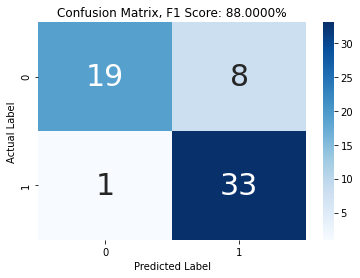

True Positive:	33
True Negative:	19
False Positive:	8
False Negative:	1


In [437]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(conf_matrix, annot=True,cmap='Blues',annot_kws={"size": 30})
plt.title("Confusion Matrix, F1 Score: {:3.4%}".format(f1score))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print('True Positive:\t{}'.format(conf_matrix[1,1]))
print('True Negative:\t{}'.format(conf_matrix[0,0]))
print('False Positive:\t{}'.format(conf_matrix[0,1]))
print('False Negative:\t{}'.format(conf_matrix[1,0]))

##  Receiver Operating Characteristics (ROC) Curve<a id="eval_roc"></a>   
AUC–ROC curve is the model selection probability curve. AUC area is covered by the curve is the area between the orange line (ROC) and the axis.  The bigger the area covered, the better the machine learning models. Ideal value for AUC is 1.

*  **ROC** - Receiver Operating Characteristics
*  **AUC** - Area Under the Curve

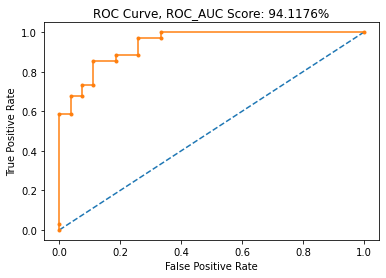

In [199]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

LR.probability = True   # need for predict_proba to work
LR.fit(X_train,y_train)
y_predita = LR.predict_proba(X_test)
y_predita = y_predita[:,1]   # positive values only
    
ROC_AUC = roc_auc_score(y_test, y_predita)
fpr, tpr, thresholds = roc_curve(y_test, y_predita)

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve, ROC_AUC Score: {:3.4%}".format(ROC_AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Classification Report<a id="eval_class"></a>   
**Precision** is a measure of the accuracy, provided that a class label has been predicted. It is defined by:   
    ```precision = True Positive/(True Positive + False Positive)```   
    
**Recall** is the true positive rate:    
    ```recall = True Positive/(True Positive + False Negative)```   
    
**F1-Score** is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (which represents perfect precision and recall) and its worst at 0    
    ```F1-Score = 2x (precision x recall)/ (precision + recall)```

In [200]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81        27
         1.0       0.80      0.97      0.88        34

    accuracy                           0.85        61
   macro avg       0.88      0.84      0.84        61
weighted avg       0.87      0.85      0.85        61



##  Log Loss<a id="eval_log"></a>   
Logarithmic loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of machine learning models is to minimize this value. A perfect model would have a log loss of 0.

In [201]:
from sklearn.metrics import log_loss

#  predict_proba returns estimates for all classes
y_predict_prob = LR.predict_proba(X_test)
print(y_predict_prob[0:5])

print("\nLog Loss:  {:3.4}".format(log_loss(y_test, y_predict_prob)))

[[0.47811612 0.52188388]
 [0.58807101 0.41192899]
 [0.36786951 0.63213049]
 [0.42707699 0.57292301]
 [0.6687276  0.3312724 ]]

Log Loss:  0.5133


The next sections mark new code written to evaluate and enhance model fairness
---
#  Fairness Evaluation <a id="coll"></a>

In [202]:
!pip install aif360==0.3.0 
!pip install BlackBoxAuditing
!pip install folktables

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [449]:
from aif360.datasets import BinaryLabelDataset, StandardDataset
from aif360.algorithms.preprocessing import DisparateImpactRemover, Reweighing
from aif360.algorithms.inprocessing import PrejudiceRemover
from aif360.algorithms.postprocessing import CalibratedEqOddsPostprocessing, RejectOptionClassification, EqOddsPostprocessing
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

import BlackBoxAuditing

plt.rcParams.update({'font.size': 15})

In [450]:
train_full = pd.concat([X_train, y_train], axis=1)
test_full = pd.concat([X_test, y_test], axis=1)

## Fairness Evaluation Choices:
As part of the fairness evaluation of this classifier using Aif360, we have to make a few key choices to define fairness. Notably, the key choices we make below are:
* We set a positive heart disease prediction as a favorable label and a negative one as unfavorable. The concept of favorable vs. unfavorable is a relatively arbitrary choice since this classifier isn't being used to distribute a benefit.
* We choose males as the unpriviliged group. This choice was made after iteration on the fairness evaluation, and we'll later see that most fairness metrics we analyze are unfavorable for the male subpopulation

In [451]:
# Create Aif360 Datasets for our train and test sets

dataset_train = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=train_full,
    label_names=['target'],
    protected_attribute_names=['sex_male'])

dataset_test = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=test_full,
    label_names=['target'],
    protected_attribute_names=['sex_male'])

privileged_groups = [{'sex_male': 0}] 
unprivileged_groups = [{'sex_male': 1}]

In [452]:
# This function quantifies and prints key fairness metrics for a given classifier
def get_metrics(preds, data_df, target, protected_attr, privileged_groups, unprivileged_groups, verbose=True):
    X = data_df.drop(target, axis=1)
    y = data_df[target]

    accuracy = accuracy_score(y, preds)
    
    print('Accuracy on the Test Set = ' + str(accuracy))
    accuracy_priv = accuracy_score(y[X[protected_attr]==privileged_groups[0]['sex_male']], preds[X[protected_attr]==privileged_groups[0]['sex_male']])
    accuracy_unpriv = accuracy_score(y[X[protected_attr]==unprivileged_groups[0]['sex_male']], preds[X[protected_attr]==unprivileged_groups[0]['sex_male']])

    print('Privileged Accuracy on the Test Set = ' + str(accuracy_priv))
    print('Unprivileged Accuracy on the Test Set = ' + str(accuracy_unpriv))
    print('--------------------------------------\n')
    
    
    # Copy the dataset
    preds_df = data_df.copy()
    # Calculate predicted values
    preds_df[target] = preds

    orig_dataset = StandardDataset(data_df, label_name=target, protected_attribute_names=[protected_attr], 
                  privileged_classes=[[0]], favorable_classes=[1])
    preds_dataset = StandardDataset(preds_df, label_name=target, protected_attribute_names=[protected_attr], 
                  privileged_classes=[[0]], favorable_classes=[1])

    # write your code here
    pred_aif360_metric = BinaryLabelDatasetMetric(preds_dataset,
                          unprivileged_groups = unprivileged_groups,
                          privileged_groups = privileged_groups)
    disparate_impact = pred_aif360_metric.disparate_impact()
    print('Disparate Impact on the Test Set = ' + str(disparate_impact))
    print('--------------------------------------\n')

    orig_vs_preds_metrics = ClassificationMetric(orig_dataset, preds_dataset,
                                                   unprivileged_groups=unprivileged_groups,
                                                   privileged_groups=privileged_groups)
    
    false_positive_rate = orig_vs_preds_metrics.false_positive_rate()
    false_positive_rate_difference = orig_vs_preds_metrics.false_positive_rate_difference()
    print('False Positive Rate on the Test Set = ' + str(false_positive_rate))
    print('False Positive Rate Privileged on the Test Set = ' + str(orig_vs_preds_metrics.false_positive_rate(privileged=True)))
    print('False Positive Rate Unprivileged on the Test Set = ' + str(orig_vs_preds_metrics.false_positive_rate(privileged=False)))
    print('False Positive Rate Difference on the Test Set = ' + str(false_positive_rate_difference))
    print('--------------------------------------\n')
    
    false_negative_rate = orig_vs_preds_metrics.false_negative_rate()
    false_negative_rate_difference = orig_vs_preds_metrics.false_negative_rate_difference()
    print('False Negative Rate on the Test Set = ' + str(false_negative_rate))
    print('False Negative Rate Privileged on the Test Set = ' + str(orig_vs_preds_metrics.false_negative_rate(privileged=True)))
    print('False Negative Rate Unprivileged on the Test Set = ' + str(orig_vs_preds_metrics.false_negative_rate(privileged=False)))
    print('False Negative Rate Difference on the Test Set = ' + str(false_negative_rate_difference))

    return orig_vs_preds_metrics

In [453]:
# Ouptu fairness metrics for the original classifier
metrics = get_metrics(y_predict, test_full, "target", 'sex_male', privileged_groups, unprivileged_groups)

Accuracy on the Test Set = 0.8524590163934426
Privileged Accuracy on the Test Set = 0.9411764705882353
Unprivileged Accuracy on the Test Set = 0.8181818181818182
--------------------------------------

Disparate Impact on the Test Set = 0.8321678321678322
--------------------------------------

False Positive Rate on the Test Set = 0.2962962962962963
False Positive Rate Privileged on the Test Set = 0.2
False Positive Rate Unprivileged on the Test Set = 0.3181818181818182
False Positive Rate Difference on the Test Set = 0.11818181818181817
--------------------------------------

False Negative Rate on the Test Set = 0.029411764705882353
False Negative Rate Privileged on the Test Set = 0.0
False Negative Rate Unprivileged on the Test Set = 0.045454545454545456
False Negative Rate Difference on the Test Set = 0.045454545454545456


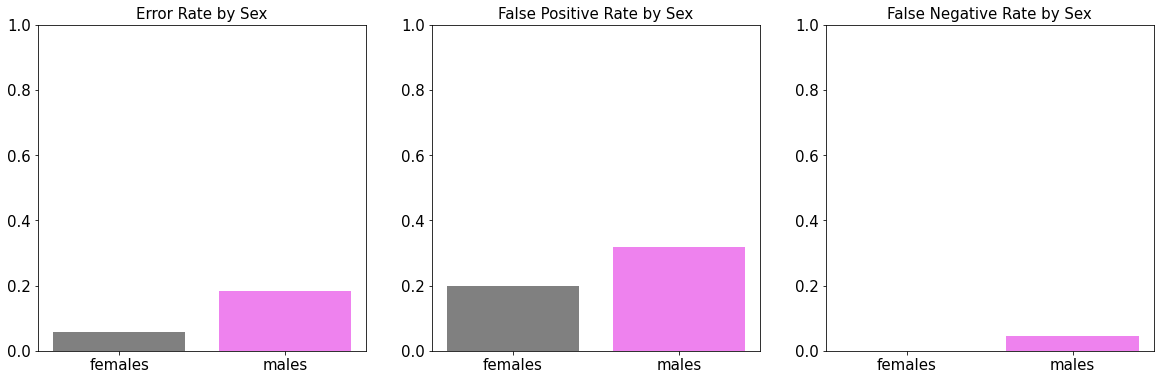

In [454]:
fig, ax = plt.subplots(1,3, figsize=(20,6))

ax[0].bar(["females", "males"], [metrics.error_rate(privileged=True), metrics.error_rate(privileged=False)], 
          color = ['grey', 'violet'])
ax[1].bar(["females", "males"], [metrics.false_positive_rate(privileged=True),
                 metrics.false_positive_rate(privileged=False)], color = ['grey', 'violet'])
ax[2].bar(["females", "males"], [metrics.false_negative_rate(privileged=True), 
                 metrics.false_negative_rate(privileged=False)], color = ['grey', 'violet'])

ax[0].set_title('Error Rate by Sex', fontsize=15)
ax[1].set_title('False Positive Rate by Sex', fontsize=15)
ax[2].set_title('False Negative Rate by Sex', fontsize=15)

ax[0].set_ylim(0, 1)
ax[1].set_ylim(0, 1)
ax[2].set_ylim(0, 1)

plt.show()

We make the following observations:
* We note that males have a lower accuracy, higher false positive rate and higher false negative rate than females. This suggests that the classifier underperforms for the male subpopulation across all dimensions. Males are both more likely to be predicted as having heart disease when they do not (which could lead to unnecessary intervention) and are also more likely to be predicted as not having heart disease when they do (which could prevent them receiving lifesaving intervention)
* We also see a disparate impact of 0.83 suggesting that Males are less likely to be predicted as having heart disease than Women. It is unclear if this, by itself suggests that the classifier is unfair and depends on prior ingoing beliefs / findings about whether males and females are expected to have heart disease at an equal rate or not.

---
# Pre and Post Processing to Improve Fairness

Our fairness interventions rely on ingoing hypotheses regarding the importance of different fairness metrics and the impact of unfair predictions. We choose to try two fairness mitigation techniques:
* A pre-processing technique called Reweighing. Reweighing weights the examples in each (group, label) combination differently based on occurance frequencies to ensure fairness before classification. This is primarily focused on removing disparate impact by increasing the relative weight unpriviliged and favorable examples (in this case that would be males with heart disease). We expect this to improve disparate impact, which would make the classifier more fair if we believe that males and females are expected to get heart disease at similar rates
* A post-processing technique called Reject Option Classification with "Average odds difference" as a metric. This technique focuses on optimizing over a range of classification thresholds to identify a decision boundry with the highest uncertainty where changing the predictions (i.e. giving favorable predictions to the unprivileged group and unfavorable predictions to the priviliged group) will help improve the provided metric. We choose Average odds difference as a metric because here we want to try to reduce false positive rate disparities between the two groups, even if it comes at the expense of making disparate impact worse. If we believe that males and females have different expected rates of heart disease, then this tradeoff makes sense and would help prevent false positive predictions for males, which in turn will lead to fewer unnecessary medical interventions.

## Reweighing

In [455]:
reweigh = Reweighing(unprivileged_groups, privileged_groups)
dataset_transf_train = reweigh.fit_transform(dataset_train)


In [456]:
LR_new = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train, sample_weight = dataset_transf_train.instance_weights)

repaired_metrics = get_metrics(LR_new.predict(X_test), test_full, "target", "sex_male", privileged_groups, unprivileged_groups)


Accuracy on the Test Set = 0.8852459016393442
Privileged Accuracy on the Test Set = 1.0
Unprivileged Accuracy on the Test Set = 0.8409090909090909
--------------------------------------

Disparate Impact on the Test Set = 0.9337121212121211
--------------------------------------

False Positive Rate on the Test Set = 0.25925925925925924
False Positive Rate Privileged on the Test Set = 0.0
False Positive Rate Unprivileged on the Test Set = 0.3181818181818182
False Positive Rate Difference on the Test Set = 0.3181818181818182
--------------------------------------

False Negative Rate on the Test Set = 0.0
False Negative Rate Privileged on the Test Set = 0.0
False Negative Rate Unprivileged on the Test Set = 0.0
False Negative Rate Difference on the Test Set = 0.0


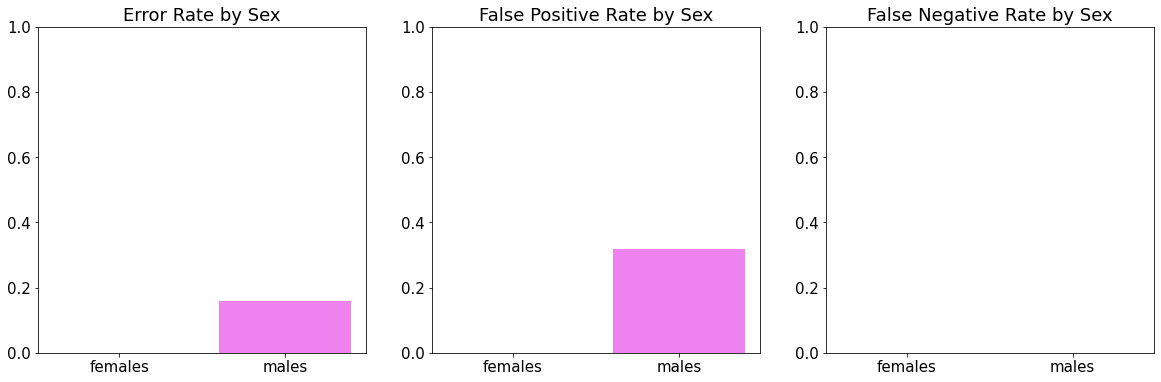

In [457]:
fig, ax = plt.subplots(1,3, figsize=(20,6))

ax[0].bar(["females", "males"], [repaired_metrics.error_rate(privileged=True), repaired_metrics.error_rate(privileged=False)], 
          color = ['grey', 'violet'])
ax[1].bar(["females", "males"], [repaired_metrics.false_positive_rate(privileged=True),
                 repaired_metrics.false_positive_rate(privileged=False)], color = ['grey', 'violet'])
ax[2].bar(["females", "males"], [repaired_metrics.false_negative_rate(privileged=True), 
                 repaired_metrics.false_negative_rate(privileged=False)], color = ['grey', 'violet'])

ax[0].set_title('Error Rate by Sex')
ax[1].set_title('False Positive Rate by Sex')
ax[2].set_title('False Negative Rate by Sex')

ax[0].set_ylim(0, 1)
ax[1].set_ylim(0, 1)
ax[2].set_ylim(0, 1)

plt.show()

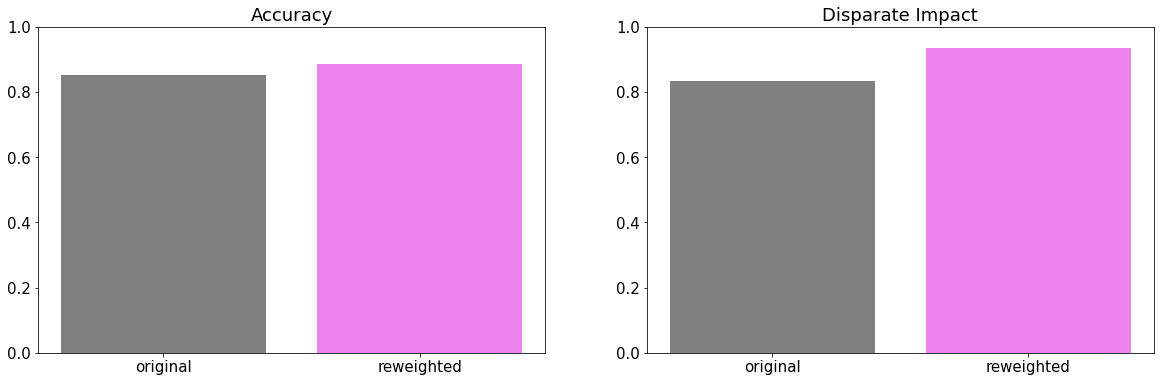

In [458]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].bar(["original", "reweighted"], [metrics.accuracy(), repaired_metrics.accuracy()], 
          color = ['grey', 'violet'])
ax[1].bar(["original", "reweighted"], [metrics.disparate_impact(), repaired_metrics.disparate_impact()], 
          color = ['grey', 'violet'])

ax[0].set_title('Accuracy')
ax[1].set_title('Disparate Impact')

ax[0].set_ylim(0, 1)
ax[1].set_ylim(0, 1)

plt.show()

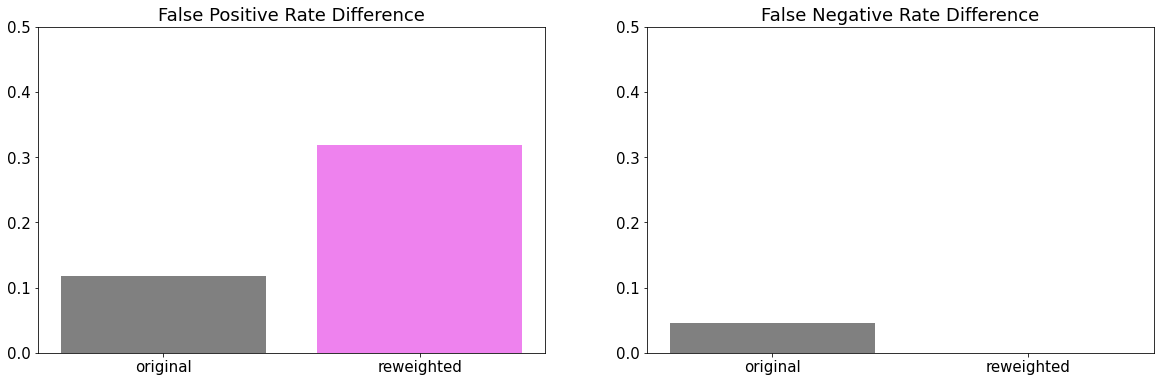

In [459]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].bar(["original", "reweighted"], [metrics.false_positive_rate_difference(), repaired_metrics.false_positive_rate_difference()], 
          color = ['grey', 'violet'])
ax[1].bar(["original", "reweighted"], [metrics.false_negative_rate_difference(), repaired_metrics.false_negative_rate_difference()], 
          color = ['grey', 'violet'])

ax[0].set_title('False Positive Rate Difference')
ax[1].set_title('False Negative Rate Difference')

ax[0].set_ylim(0, 0.5)
ax[1].set_ylim(0, 0.5)

plt.show()

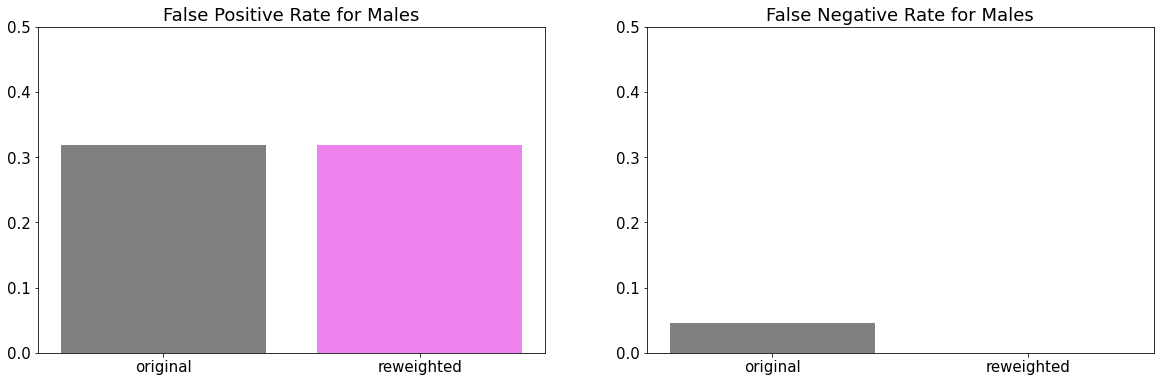

In [460]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].bar(["original", "reweighted"], [metrics.false_positive_rate(privileged=False), repaired_metrics.false_positive_rate(privileged=False)], 
          color = ['grey', 'violet'])
ax[1].bar(["original", "reweighted"], [metrics.false_negative_rate(privileged=False), repaired_metrics.false_negative_rate(privileged=False)], 
          color = ['grey', 'violet'])

ax[0].set_title('False Positive Rate for Males')
ax[1].set_title('False Negative Rate for Males')

ax[0].set_ylim(0, 0.5)
ax[1].set_ylim(0, 0.5)

plt.show()

Key observations:
* As expected, we see an improvement in disparate impact as it goes up to 0.93. Interestingly, we also see an improvement in accuracy. We hypothesize that this is primarily because of noise associated with having a small test set.
* Since this classifier now achieves 100\% accuracy for females, we focus on false positve and false negative rates for the male subpopulation. We see that the false negative rates for males has decreased to 0, however the false positive rates have stayed the same. This indicates that while this classifier helps reduce disparity by improving male false negative rates (thereby ensuring that males who have heart disease are correctly diagnosed), it fails to improve fairness associated with male false positive rates, therefore the same rate of males that do not have heart disease get flagged as having heart disease (thereby continuing to lead to unnecessary medical intervention depending on context of use).

## Reject Option Classification

In [467]:
dataset_test_pred = dataset_test.copy(deepcopy = True)

dataset_test_pred.scores = LR.predict_proba(X_test)[:,1].reshape(-1,1)

ROC = RejectOptionClassification(unprivileged_groups, privileged_groups, metric_name='Average odds difference')

test_pred = ROC.fit_predict(dataset_test, dataset_test_pred)

In [468]:
metrics_calibrated = get_metrics(test_pred.labels.flatten(), test_full, "target", "sex_male", privileged_groups, unprivileged_groups)


Accuracy on the Test Set = 0.8688524590163934
Privileged Accuracy on the Test Set = 1.0
Unprivileged Accuracy on the Test Set = 0.8181818181818182
--------------------------------------

Disparate Impact on the Test Set = 0.6439393939393939
--------------------------------------

False Positive Rate on the Test Set = 0.1111111111111111
False Positive Rate Privileged on the Test Set = 0.0
False Positive Rate Unprivileged on the Test Set = 0.13636363636363635
False Positive Rate Difference on the Test Set = 0.13636363636363635
--------------------------------------

False Negative Rate on the Test Set = 0.14705882352941177
False Negative Rate Privileged on the Test Set = 0.0
False Negative Rate Unprivileged on the Test Set = 0.22727272727272727
False Negative Rate Difference on the Test Set = 0.22727272727272727


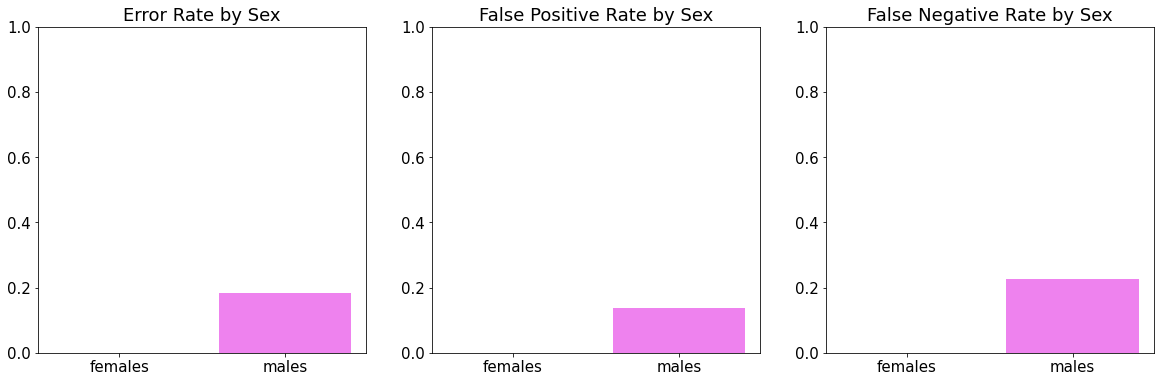

In [469]:
fig, ax = plt.subplots(1,3, figsize=(20,6))

ax[0].bar(["females", "males"], [metrics_calibrated.error_rate(privileged=True), metrics_calibrated.error_rate(privileged=False)], 
          color = ['grey', 'violet'])
ax[1].bar(["females", "males"], [metrics_calibrated.false_positive_rate(privileged=True),
                 metrics_calibrated.false_positive_rate(privileged=False)], color = ['grey', 'violet'])
ax[2].bar(["females", "males"], [metrics_calibrated.false_negative_rate(privileged=True), 
                 metrics_calibrated.false_negative_rate(privileged=False)], color = ['grey', 'violet'])

ax[0].set_title('Error Rate by Sex')
ax[1].set_title('False Positive Rate by Sex')
ax[2].set_title('False Negative Rate by Sex')

ax[0].set_ylim(0, 1)
ax[1].set_ylim(0, 1)
ax[2].set_ylim(0, 1)

plt.show()

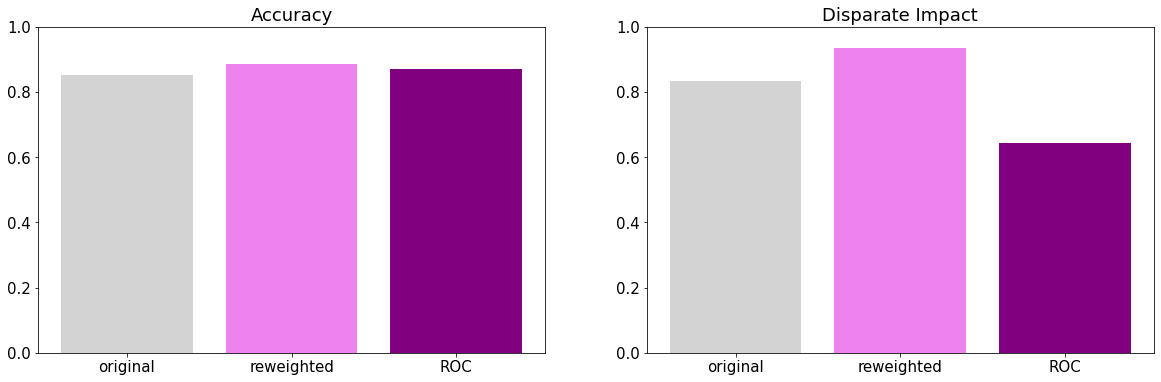

In [470]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].bar(["original", "reweighted", "ROC"], [metrics.accuracy(), repaired_metrics.accuracy(), metrics_calibrated.accuracy()], 
          color = ['lightgrey', 'violet', "purple"])
ax[1].bar(["original", "reweighted", "ROC"], [metrics.disparate_impact(), repaired_metrics.disparate_impact(), metrics_calibrated.disparate_impact()], 
          color = ['lightgrey', 'violet', "purple"])

ax[0].set_title('Accuracy')
ax[1].set_title('Disparate Impact')

ax[0].set_ylim(0, 1)
ax[1].set_ylim(0, 1)

plt.show()

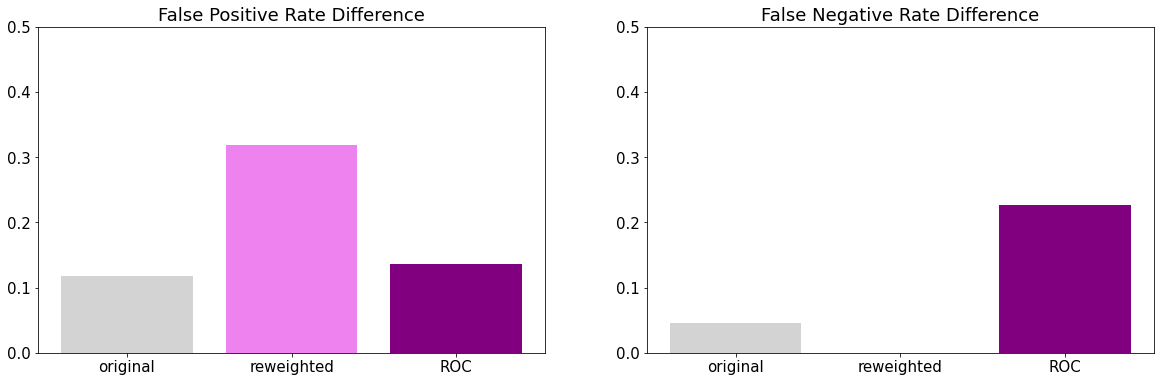

In [471]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].bar(["original", "reweighted", "ROC"], [metrics.false_positive_rate_difference(), repaired_metrics.false_positive_rate_difference(), metrics_calibrated.false_positive_rate_difference()], 
          color = ['lightgrey', 'violet', "purple"])
ax[1].bar(["original", "reweighted", "ROC"], [metrics.false_negative_rate_difference(), repaired_metrics.false_negative_rate_difference(), metrics_calibrated.false_negative_rate_difference()], 
          color = ['lightgrey', 'violet', "purple"])

ax[0].set_title('False Positive Rate Difference')
ax[1].set_title('False Negative Rate Difference')

ax[0].set_ylim(0, 0.5)
ax[1].set_ylim(0, 0.5)

plt.show()

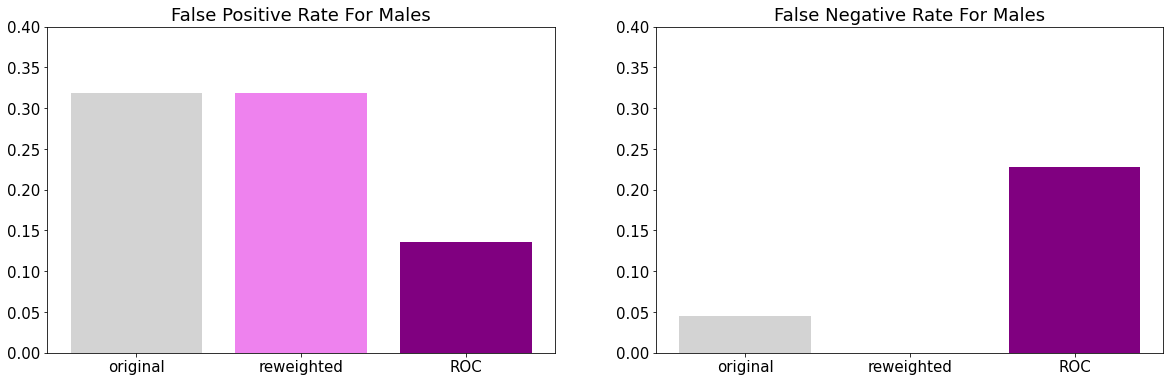

In [472]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].bar(["original", "reweighted", "ROC"], [metrics.false_positive_rate(privileged=False), repaired_metrics.false_positive_rate(privileged=False), metrics_calibrated.false_positive_rate(privileged=False)], 
          color = ['lightgrey', 'violet', "purple"])
ax[1].bar(["original", "reweighted", "ROC"], [metrics.false_negative_rate(privileged=False), repaired_metrics.false_negative_rate(privileged=False), metrics_calibrated.false_negative_rate(privileged=False)], 
          color = ['lightgrey', 'violet', "purple"])

ax[0].set_title('False Positive Rate For Males')
ax[1].set_title('False Negative Rate For Males')

ax[0].set_ylim(0, 0.4)
ax[1].set_ylim(0, 0.4)

plt.show()

Key Observations:
* First we observe that ROC that optimizes on Average odds difference leads to the worst disparate impact (decreasing it to 0.64). This is not unexpected since we are optimizing on odds difference instead of statistical parity. Recall that this is a tradeoff we intentionally make if we don't believe that having equal heart disease prediction rates is necessary for fairness, but rather fewer false positive disparity is more necessary.
* Since this also achieves 100\% accuracy on females, we will focus on different error rates for Males. When looking at error rates, we see that ROC results in fewer false positives for males compared to both the original model as well as the reweighing approach. However, it results in a much larger false negative rate for males. Whether this tradeoff improves fairness and impact to males depends on context of use. If this is an early warning tool to identify people with potential heart disease, this would make the impact worse because fewer males with actual heart disease would get diagnosed early given high false negatives. However, if it is a tool that would result in invasive medical tests, then fewer false positives would mean that fewer males are subject to those medical tests unnecessarily.